<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 통계적 머신러닝

    - 텍스트 분석

        NLP, BOW

        텍스트 분류

        감성분석

        문서유사도

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU

#텍스트 분석

텍스트 분석 절차

    1. 텍스트 정규화

        - 클렌징

        - 토큰화 ( 단어, 문장)

        - 필터링/스톱워드제거

        - Stemming/ Lemmatization (단어의 원형 찾기)


    2. 피처 벡턱화/추출

        - BOW (Bag of Words)

            CountVertorizer : 문서에서 단어가 나타난 빈도수

            TfidfVectorizer : 개별 문서에서 자주 출현하는 단어에 높은 가중치, 그러나 모든 문서에 자주 나타나면 가중치를 감소 시킴

        - Word2Vec

    3. ML 모델 수립/학습/평가

In [ ]:
text_sample = '''When I choose to see the good side of things, I'm not being naive. It is strategic and necessary. It’s how I’ve learned to survive through everything.'''

In [ ]:
text_sample

"When I choose to see the good side of things, I'm not being naive. It is strategic and necessary. It’s how I’ve learned to survive through everything."

In [ ]:
from nltk import sent_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sentences = sent_tokenize(text=text_sample)

In [ ]:
sentences

["When I choose to see the good side of things, I'm not being naive.",
 'It is strategic and necessary.',
 'It’s how I’ve learned to survive through everything.']

In [ ]:
len(sentences)

3

In [ ]:
from nltk import word_tokenize

In [ ]:
text_sample.split(' ')

['When',
 'I',
 'choose',
 'to',
 'see',
 'the',
 'good',
 'side',
 'of',
 'things,',
 "I'm",
 'not',
 'being',
 'naive.',
 'It',
 'is',
 'strategic',
 'and',
 'necessary.',
 'It’s',
 'how',
 'I’ve',
 'learned',
 'to',
 'survive',
 'through',
 'everything.']

In [ ]:
words = word_tokenize(text_sample)

In [ ]:
words

['When',
 'I',
 'choose',
 'to',
 'see',
 'the',
 'good',
 'side',
 'of',
 'things',
 ',',
 'I',
 "'m",
 'not',
 'being',
 'naive',
 '.',
 'It',
 'is',
 'strategic',
 'and',
 'necessary',
 '.',
 'It',
 '’',
 's',
 'how',
 'I',
 '’',
 've',
 'learned',
 'to',
 'survive',
 'through',
 'everything',
 '.']

In [ ]:
def tokenize_text(text):
    sentences = sent_tokenize(text)
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

In [ ]:
word_tokens = tokenize_text(text_sample)

In [ ]:
len(word_tokens)

3

In [ ]:
word_tokens

[['When',
  'I',
  'choose',
  'to',
  'see',
  'the',
  'good',
  'side',
  'of',
  'things',
  ',',
  'I',
  "'m",
  'not',
  'being',
  'naive',
  '.'],
 ['It', 'is', 'strategic', 'and', 'necessary', '.'],
 ['It',
  '’',
  's',
  'how',
  'I',
  '’',
  've',
  'learned',
  'to',
  'survive',
  'through',
  'everything',
  '.']]

Stopwords 제거

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.corpus.stopwords.words('english')[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [ ]:
len(nltk.corpus.stopwords.words('english'))

179

In [ ]:
word_tokens

[['When',
  'I',
  'choose',
  'to',
  'see',
  'the',
  'good',
  'side',
  'of',
  'things',
  ',',
  'I',
  "'m",
  'not',
  'being',
  'naive',
  '.'],
 ['It', 'is', 'strategic', 'and', 'necessary', '.'],
 ['It',
  '’',
  's',
  'how',
  'I',
  '’',
  've',
  'learned',
  'to',
  'survive',
  'through',
  'everything',
  '.']]

In [ ]:
stopwords_list = nltk.corpus.stopwords.words('english')

In [ ]:
stopwords_list

In [ ]:
all_tokens = []
for sentence in word_tokens:
    word_list = []
    for word in sentence:
        word = word.lower()
        if word not in stopwords_list:
            word_list.append(word)
    all_tokens.append(word_list)

In [ ]:
all_tokens

[['choose', 'see', 'good', 'side', 'things', ',', "'m", 'naive', '.'],
 ['strategic', 'necessary', '.'],
 ['’', '’', 'learned', 'survive', 'everything', '.']]

In [ ]:
import string

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
sample_txt = '''abc'de'''

In [ ]:
for i in sample_txt:
    print(i, ord(i))

a 97
b 98
c 99
' 39
d 100
e 101


In [ ]:
sample_txt.translate({98:None})

"ac'de"

In [ ]:
sample_txt.translate({39:97})

'abcade'

In [ ]:
rm_punc_dict = {}
for i in string.punctuation:
    rm_punc_dict[ord(i)] = None

In [ ]:
rm_punc_dict

In [ ]:
def rm_punc(sents):
    rm_punc_dict = {}
    for i in string.punctuation:
        rm_punc_dict[ord(i)] = None
    return sents.translate(rm_punc_dict)

In [ ]:
rm_punc(text_sample)

'When I choose to see the good side of things Im not being naive It is strategic and necessary It’s how I’ve learned to survive through everything'

In [ ]:
text_sample

"When I choose to see the good side of things, I'm not being naive. It is strategic and necessary. It’s how I’ve learned to survive through everything."

In [ ]:
stopwords_list

In [ ]:
def tokenize_text(text, stopwords_list):
    word_list=[]
    sentence_list = sent_tokenize(text=text)
    for sent in sentence_list:
        sent = rm_punc(sent)
        words = word_tokenize(sent)
        token_list = []
        for word in words:
            word = word.lower()
            if word not in stopwords_list and len(word) > 1:
                token_list.append(word)
        word_list.append(token_list)
    return word_list

In [ ]:
result = tokenize_text(text_sample, stopwords_list)

In [ ]:
result

[['choose', 'see', 'good', 'side', 'things', 'im', 'naive'],
 ['strategic', 'necessary'],
 ['learned', 'survive', 'everything']]

#단어 원형

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

In [ ]:
stemmer.stem('working')

'work'

In [ ]:
stemmer.stem('works')

'work'

In [ ]:
stemmer.stem('worked')

'work'

In [ ]:
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))

amus amus amus


In [ ]:
print(stemmer.stem('happier'), stemmer.stem('happiest'))

happy happiest


In [ ]:
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

fant fanciest


In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('all')

In [ ]:
lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))

amuse amuse amuse


In [ ]:
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))

happy happy


In [ ]:
lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a')

('fancy', 'fancy')

#BOW ( Bag of Words )

- CountVectorizer

- TfidfVectorizer

    max_df : 빈도수 최댓값 제한, = 300

    min_df : 빈도수 최촛값 제한, = 20

    max_features : 피처의 개수 제한, = 500

    stop_words : 사용자 불용어 지정

    ngram_range : n-gram 의 범위 지정 (1, 2)

    tokenizer : 토큰화를 별도의 함수로 이용시

'Agent Smith knocks the door'

2-gram



(Agent, Smith), (Smith, knocks), (knocks, the), (the, door)

1-gram

(Agen) (Smith) (knocks) (the) (door)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
text = ['사과 딸기', '딸기 바나나', '수박', '수박 수박']

In [ ]:
cnt = CountVectorizer()
cnt.fit(text)
text_cnt = cnt.transform(text)

In [ ]:
text_cnt

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
print(text_cnt)

  (0, 0)	1
  (0, 2)	1
  (1, 0)	1
  (1, 1)	1
  (2, 3)	1
  (3, 3)	2


In [ ]:
text_cnt.toarray()

array([[1, 0, 1, 0],
       [1, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 2]])

In [ ]:
cnt.get_feature_names_out()

array(['딸기', '바나나', '사과', '수박'], dtype=object)

In [ ]:
import pandas as pd
df = pd.DataFrame(text_cnt.toarray(), columns = cnt.get_feature_names_out())

In [ ]:
df

,딸기,바나나,사과,수박
0,1,0,1,0
1,1,1,0,0
2,0,0,0,1
3,0,0,0,2


In [ ]:
tfi = TfidfVectorizer()

In [ ]:
tfi.fit(text)

TfidfVectorizer()

In [ ]:
text_tfi = tfi.transform(text)
print(text_tfi)

  (0, 2)	0.7852882757103967
  (0, 0)	0.6191302964899972
  (1, 1)	0.7852882757103967
  (1, 0)	0.6191302964899972
  (2, 3)	1.0
  (3, 3)	1.0


In [ ]:
df = pd.DataFrame(text_tfi.toarray(), columns = tfi.get_feature_names_out())

In [ ]:
df

,딸기,바나나,사과,수박
0,0.61913,0.000000,0.785288,0.0
1,0.61913,0.785288,0.000000,0.0
2,0.00000,0.000000,0.000000,1.0
3,0.00000,0.000000,0.000000,1.0


#희소 행렬 표현 형식 : COO, CSR

In [ ]:
import numpy as np

In [ ]:
from scipy import sparse

In [ ]:
dense = np.array([[3, 0, 1], [0, 2, 0]])

In [ ]:
dense

array([[3, 0, 1],
       [0, 2, 0]])

In [ ]:
data = np.array([3, 1, 2])

In [ ]:
data

array([3, 1, 2])

In [ ]:
row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

In [ ]:
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [ ]:
sparse_coo

<2x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in COOrdinate format>

In [ ]:
print(sparse_coo)

  (0, 0)	3
  (0, 2)	1
  (1, 1)	2


In [ ]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

In [ ]:
dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

In [ ]:
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

In [ ]:
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

In [ ]:
print(sparse_coo)

In [ ]:
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

In [ ]:
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

In [ ]:
sparse_csr.toarray()

array([[0, 0, 1, 0, 0, 5],
       [1, 4, 0, 3, 2, 5],
       [0, 6, 0, 3, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 8],
       [1, 0, 0, 0, 0, 0]])

In [ ]:
sparse_coo.toarray()

array([[0, 0, 1, 0, 0, 5],
       [1, 4, 0, 3, 2, 5],
       [0, 6, 0, 3, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 8],
       [1, 0, 0, 0, 0, 0]])

예제 : NewsGroups

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
news_data = fetch_20newsgroups(subset='all', random_state=156)

In [ ]:
news_data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
news_data.target

array([ 8,  8, 12, ...,  7,  3,  9])

In [ ]:
news_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
pd.Series(news_data.target).value_counts().sort_index()

0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64

In [ ]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

fetch_20newsgroups

    remove : header, footer 제거

    subset : all, train, test

In [ ]:
train_news = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'),
                                random_state=156)

In [ ]:
test_news = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'),
                               random_state=156)

In [ ]:
X_train = train_news.data
y_train = train_news.target

In [ ]:
X_test = test_news.data
y_test = test_news.target

In [ ]:
y_train.shape, y_test.shape

((11314,), (7532,))

In [ ]:
len(X_train), len(X_test)

(11314, 7532)

In [ ]:
X_train[:3]

["\n\nWhat I did NOT get with my drive (CD300i) is the System Install CD you\nlisted as #1.  Any ideas about how I can get one?  I bought my IIvx 8/120\nfrom Direct Express in Chicago (no complaints at all -- good price & good\nservice).\n\nBTW, I've heard that the System Install CD can be used to boot the mac;\nhowever, my drive will NOT accept a CD caddy is the machine is off.  How can\nyou boot with it then?\n\n--Dave\n",
 '\n\t"And in that day you will ask Me no question.  Truly, truly, I say to \n\tyou, if you shall ask the Father for anything, He will give it to you \n\tin my name.  Until now you have asked for nothing in My name; ask, and \n\tyou will receive, that your joy may be made full."\n\t\t\t\t-John 16:23-24\n\nI don\'t believe that we necessarily have to say " . . . In Christ\'s name.  \nAmen," for our prayers to be heard, but it glorifies the Son, when we \nacknowledge that our prayer is made possible by Him.  I believe that just as \nthose who were saved in the OT, co

In [ ]:
print(X_train[2])


I have to disagree with you on this one.  It is anything BUT common.  In the
4 or 5 years I have been watching hockey I have NEVER seen this happen EVER.

I am not sure what league you have been watching.  :-)

Anyone else agree with this?


In [ ]:
y_train

array([ 4, 15, 10, ...,  3,  9,  9])

In [ ]:
cnt_vect = CountVectorizer()

In [ ]:
cnt_vect.fit(X_train)

CountVectorizer()

In [ ]:
X_train_cnt_vect = cnt_vect.transform(X_train)
X_test_cnt_vect = cnt_vect.transform(X_test)

In [ ]:
X_train_cnt_vect.shape, X_test_cnt_vect.shape

((11314, 101631), (7532, 101631))

In [ ]:
y_train, y_test

(array([ 4, 15, 10, ...,  3,  9,  9]), array([ 4, 11,  1, ...,  6, 17, 15]))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Solver :  비용함수의 최솟값을 찾아가는 방법을 지정하는 파라미터

lbfg : 멀티 클래스

libliner : 2 진분류, 데이터가 적을때, one-versus-rest

In [ ]:
lr = LogisticRegression(solver='liblinear') # solver 기본값 lbfg, liblinear

In [ ]:
lr.fit(X_train_cnt_vect, y_train)
pred = lr.predict(X_test_cnt_vect)

In [ ]:
accuracy_score(y_test, pred)

0.6168348380244291

In [ ]:
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_tfidf, y_train)
pred = lr.predict(X_test_tfidf)
accuracy_score(y_test, pred)

0.6775092936802974

In [ ]:
tfidf_vect = TfidfVectorizer(max_df=300, ngram_range=(1, 2), stop_words='english')

In [ ]:
tfidf_vect.fit(X_train)
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_tfidf, y_train)
pred = lr.predict(X_test_tfidf)
accuracy_score(y_test, pred)

0.6901221455124801

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = { 'C':[0.01, 0.1, 1, 5, 10]}

In [ ]:
lr = LogisticRegression(solver='liblinear')

In [ ]:
grid_cv_lr = GridSearchCV(lr, param_grid=params, cv=3, scoring='accuracy')

In [ ]:
grid_cv_lr.fit(X_train_tfidf, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 5, 10]}, scoring='accuracy')

In [ ]:
grid_cv_lr.best_params_

{'C': 10}

In [ ]:
pred = grid_cv_lr.predict(X_test_tfidf)
accuracy_score(y_test, pred)

0.7039298990971854

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([
    ('tfidf_vect', TfidfVectorizer(max_df=300, ngram_range=(1, 2), stop_words='english')),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))
])

In [ ]:
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
accuracy_score(y_test, pred)

0.7039298990971854

In [ ]:
params = {'tfidf_vect__ngram_range':[(1, 1), (1, 2), (1, 3)],
          'tfidf_vect__max_df':[100, 300, 700],
          'lr_clf__C': [1, 5, 10]}

In [ ]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression(solver='liblinear'))
])

In [ ]:
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='accuracy')

In [ ]:
grid_cv_pipe.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf_vect',
                                        TfidfVectorizer(stop_words='english')),
                                       ('lr_clf',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'lr_clf__C': [1, 5, 10],
                         'tfidf_vect__max_df': [100, 300, 700],
                         'tfidf_vect__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring='accuracy')

In [ ]:
print(grid_cv_pipe.best_params_)

{'lr_clf__C': 10, 'tfidf_vect__max_df': 700, 'tfidf_vect__ngram_range': (1, 2)}


In [ ]:
grid_cv_pipe.best_score_

0.7550828826229531

#감성분석 - 지도학습

In [ ]:
import pandas as pd
review_df = pd.read_csv('./drive/MyDrive/data/labeledTrainData.tsv', header=0, sep='\t',
                        quoting=3)

header : id, sentiment, review

1 : 긍정

0 : 부정

In [ ]:
review_df.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [ ]:
review_df['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [ ]:
review_df['review']=review_df['review'].str.replace('<br />', ' ')

In [ ]:
review_df['review'][0]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay   Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him   The actual feature film bit when it finally starts is only on for 

In [ ]:
import re
review_df['review'] = review_df['review'].apply(lambda x :re.sub('[^a-zA-Z]', ' ', x))

In [ ]:
review_df['review'][11]

' Although I generally do not like remakes believing that remakes are waste of time  this film is an exception  I didn t actually know so far until reading the previous comment that this was a remake  so my opinion is purely about the actual film and not a comparison   The story and the way it is written is no question  it is Capote  There is no need for more words   The play of Anthony Edwards and Eric Roberts is superb  I have seen some movies with them  each in one or the other  I was certain that they are good actors and in case of Eric I always wondered why his sister is the number   famous star and not her brother  This time this certainty is raised to fact  no question  His play  just as well as the play of Mr  Edwards is clearly the top of all their profession   I recommend this film to be on your top    films to see and keep on your DVD shelves  '

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
class_df = review_df['sentiment']
feature_df = review_df.drop(['id', 'sentiment'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.2,
                                                    random_state=156)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000, 1), (5000, 1), (20000,), (5000,))

In [ ]:
from sklearn.metrics import roc_auc_score

1. CountVectorizer

2. TfidfVectorizer

In [ ]:
pipeline = Pipeline([
    ('cnt_vec', CountVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))
])

In [ ]:
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])

In [ ]:
accuracy_score(y_test, pred)

0.8924

In [ ]:
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]

In [ ]:
roc_auc_score(y_test, pred_probs)

0.9553672515368852

In [ ]:
pipeline = Pipeline([
    ('tfidf_vec', TfidfVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))
])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]

In [ ]:
accuracy_score(y_test, pred)

0.902

In [ ]:
roc_auc_score(y_test, pred_probs)

0.9646908619364754

In [ ]:
X_train_arr = X_train_tfidf.toarray()

In [ ]:
X0 = X_train_arr[0]

In [ ]:
X0.shape

(943453,)

In [ ]:
X1 = X_train_arr[1]

In [ ]:
X1.shape

(943453,)

### 문서 유사도 측정 방법 – 코사인 유사도

벡터 내적 정의

$\mathbf{A} \cdot \mathbf{B} = ||\mathbf{A}|| \ ||\mathbf{B}|| \ cos(\theta) $

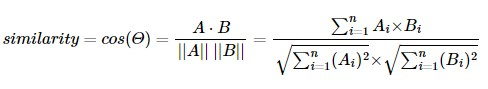

In [ ]:
import numpy as np

In [ ]:
def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
    similarity = dot_product/ l2_norm
    return similarity

In [ ]:
doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

In [ ]:
tfidf_vect_simple = TfidfVectorizer()

In [ ]:
fvs = tfidf_vect_simple.fit_transform(doc_list)

In [ ]:
fvs.toarray()

array([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
        0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
        0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
        0.49087711, 0.        , 0.24543856],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.23402865, 0.39624495, 0.23402865, 0.        ,
        0.3013545 , 0.        , 0.39624495, 0.        , 0.23402865,
        0.23402865, 0.39624495, 0.4680573 ],
       [0.        , 0.30985601, 0.        , 0.30985601, 0.30985601,
        0.30985601, 0.18300595, 0.        , 0.18300595, 0.30985601,
        0.23565348, 0.30985601, 0.        , 0.        , 0.18300595,
        0.3660119 , 0.        , 0.3660119 ]])

In [ ]:
fvs.shape

(3, 18)

In [ ]:
feature_vect_dense = fvs.todense()

In [ ]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

In [ ]:
cos_similarity(vect1, vect2)

0.40207758214950134

In [ ]:
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)

In [ ]:
cos_similarity(vect1, vect3)

0.4042504477594862

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
ssp = cosine_similarity(fvs[0], fvs)

In [ ]:
ssp

array([[1.        , 0.40207758, 0.40425045]])

In [ ]:
cosine_similarity(fvs[0], fvs[1:])

array([[0.40207758, 0.40425045]])

In [ ]:
cosine_similarity(fvs, fvs)

array([[1.        , 0.40207758, 0.40425045],
       [0.40207758, 1.        , 0.45647296],
       [0.40425045, 0.45647296, 1.        ]])